In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Data

df= pd.read_csv('pronostico_dataset.csv')
df

,ID;age;systolic_bp;diastolic_bp;cholesterol;prognosis
0,0;77.196339508802097;85.288742418610894;80.021...
1,1;63.5298502234171;99.379735822841894;84.85236...
2,2;69.003986220296298;111.349455002811;109.8506...
3,3;82.638209813584396;95.056127546033593;79.666...
4,4;78.346285672257494;109.154590823354;90.71322...
...,...
5995,5995;49.611850239536302;94.857639409400207;86....
5996,5996;63.099686031701999;100.039527119618;93.51...
5997,5997;55.562242769599898;98.421446235450603;102...
5998,5998;63.468956315401201;106.809288900789;88.06...


In [4]:
df = pd.read_csv('pronostico_dataset.csv', delimiter=';')
df

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


# EDA

In [5]:
df.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [7]:
df.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Length: 6000, dtype: bool

In [9]:
# Checking unique values in the prognosis column
df['prognosis'].unique()

array(['retinopathy', 'no_retinopathy'], dtype=object)

In [10]:
# Encode the target variable
label_encoder = LabelEncoder()
df["prognosis"] = label_encoder.fit_transform(df["prognosis"])  # 'retinopathy' -> 1, 'no retinopathy' -> 0

In [14]:
# Verify the conversion
df['prognosis'].unique()

array([1, 0])

In [11]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,1
1,1,63.529850,99.379736,84.852361,110.382411,1
2,2,69.003986,111.349455,109.850616,100.828246,1
3,3,82.638210,95.056128,79.666851,87.066303,1
4,4,78.346286,109.154591,90.713220,92.511770,1


In [12]:
# Checking unique values in the ID column
df['ID'].unique()

array([   0,    1,    2, ..., 5997, 5998, 5999], dtype=int64)

In [13]:
# Drop the unnecessary column
df = df.drop(columns=['ID'])

In [16]:
df.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis         int32
dtype: object

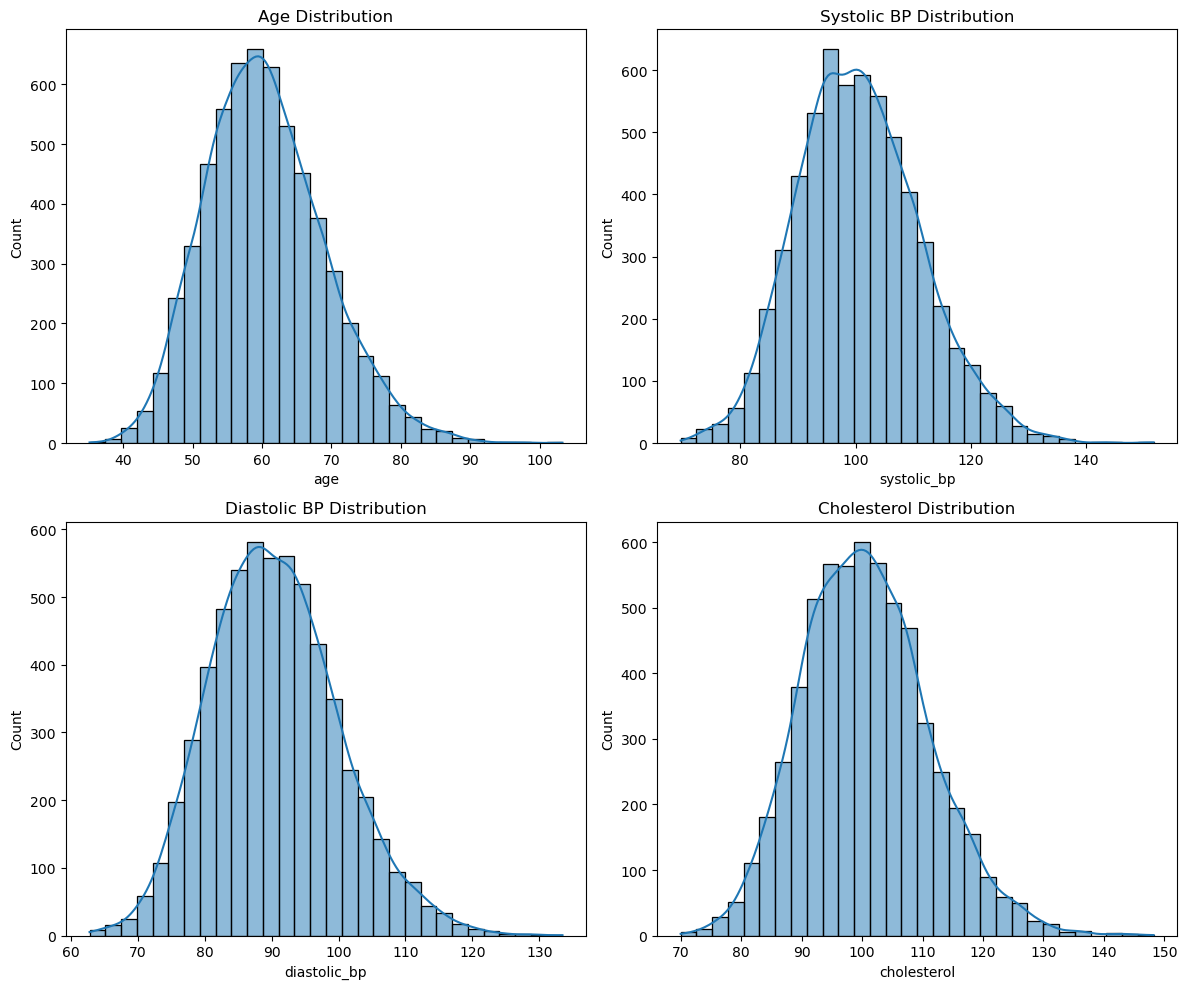

In [15]:
# Visualizing feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0]).set(title='Age Distribution')
sns.histplot(df['systolic_bp'], bins=30, kde=True, ax=axes[0, 1]).set(title='Systolic BP Distribution')
sns.histplot(df['diastolic_bp'], bins=30, kde=True, ax=axes[1, 0]).set(title='Diastolic BP Distribution')
sns.histplot(df['cholesterol'], bins=30, kde=True, ax=axes[1, 1]).set(title='Cholesterol Distribution')

plt.tight_layout()
plt.show()

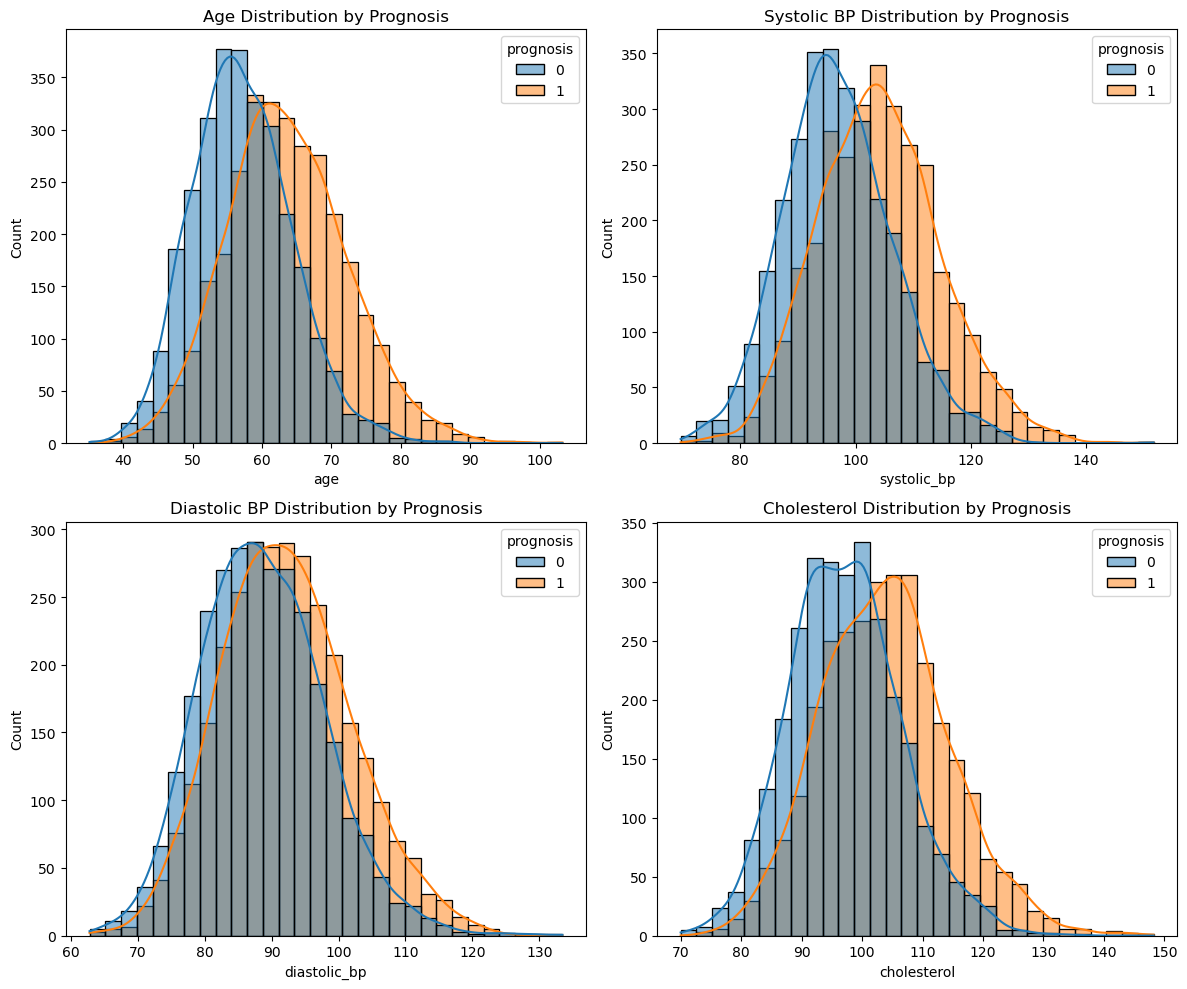

In [17]:
# Feature distributions by prognosis using histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df, x="age", hue="prognosis", bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution by Prognosis")
sns.histplot(df, x="systolic_bp", hue="prognosis", bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Systolic BP Distribution by Prognosis")
sns.histplot(df, x="diastolic_bp", hue="prognosis", bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Diastolic BP Distribution by Prognosis")
sns.histplot(df, x="cholesterol", hue="prognosis", bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Cholesterol Distribution by Prognosis")
plt.tight_layout()
plt.show()


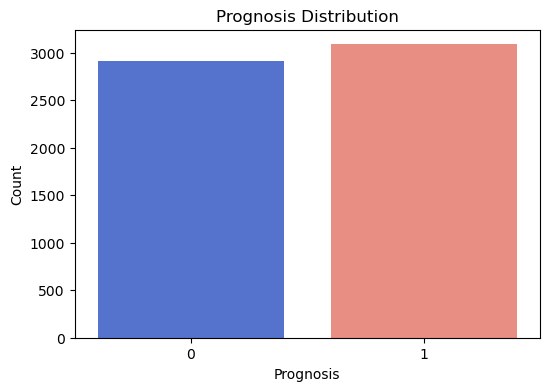

In [18]:
# Count plot for prognosis distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['prognosis'], palette=['royalblue', 'salmon'])
plt.title("Prognosis Distribution")
plt.xlabel("Prognosis")
plt.ylabel("Count")
plt.show()

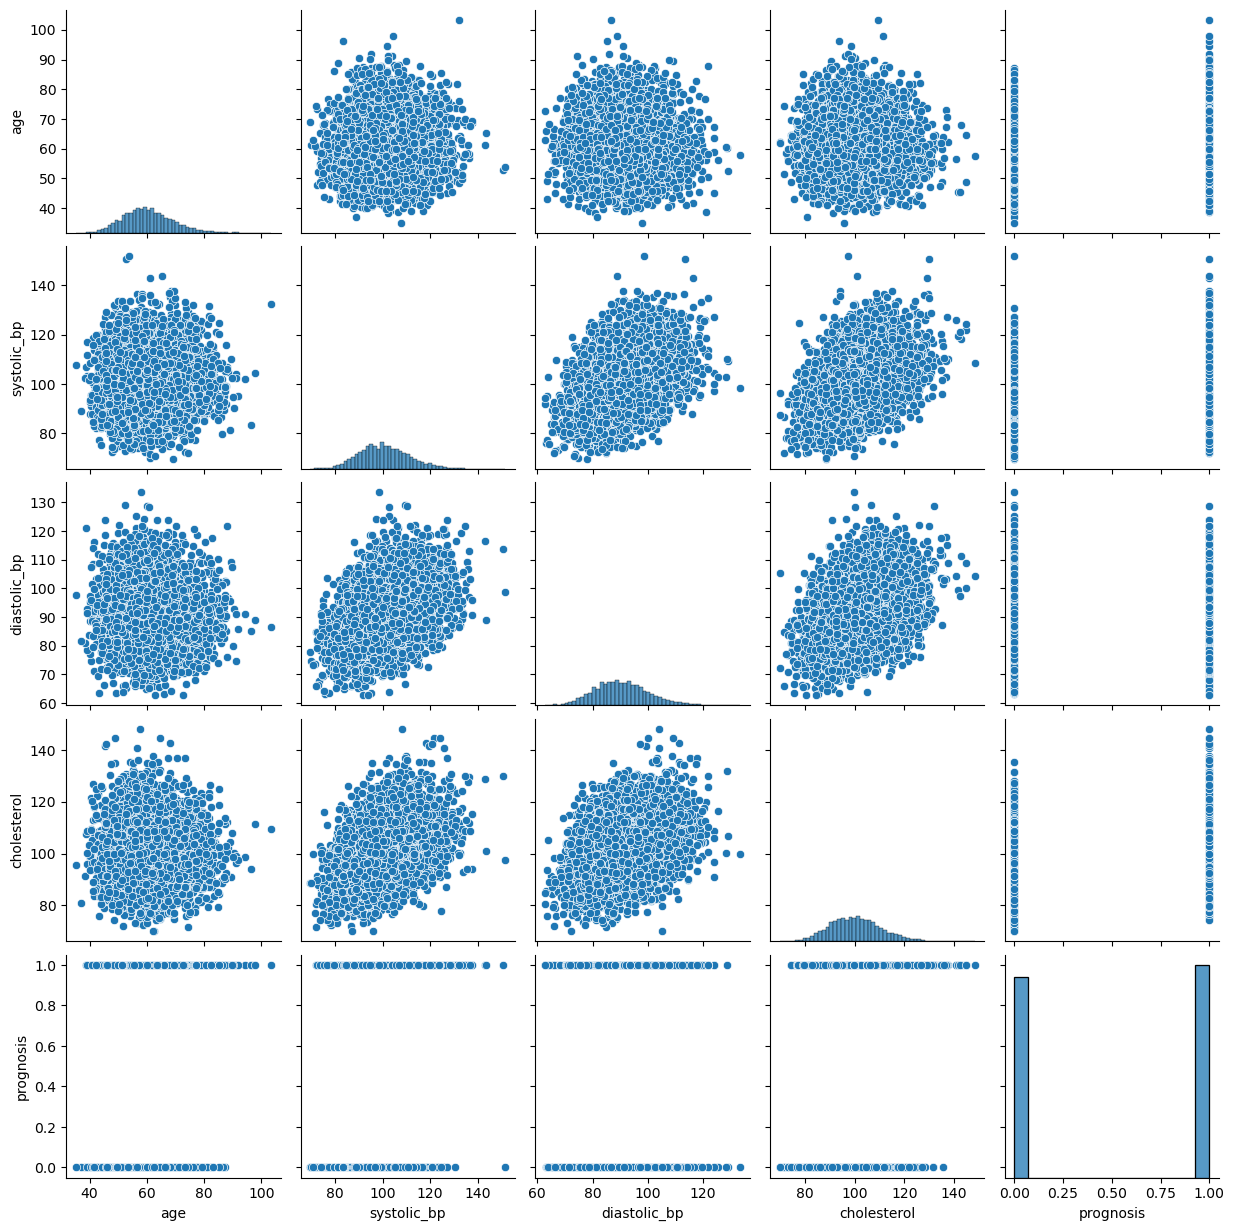

In [17]:
sns.pairplot(df)

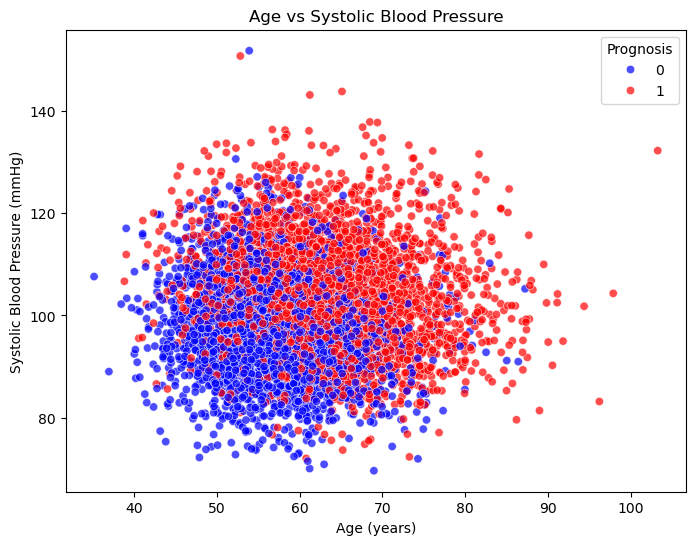

In [19]:
# Scatter plot: Age vs Systolic BP, colored by prognosis #Higher systolic BP is more common in older patients with retinopathy.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["age"], y=df["systolic_bp"], hue=df["prognosis"], alpha=0.7, palette=["blue", "red"])
plt.title("Age vs Systolic Blood Pressure")
plt.xlabel("Age (years)")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.legend(title="Prognosis")
plt.show()

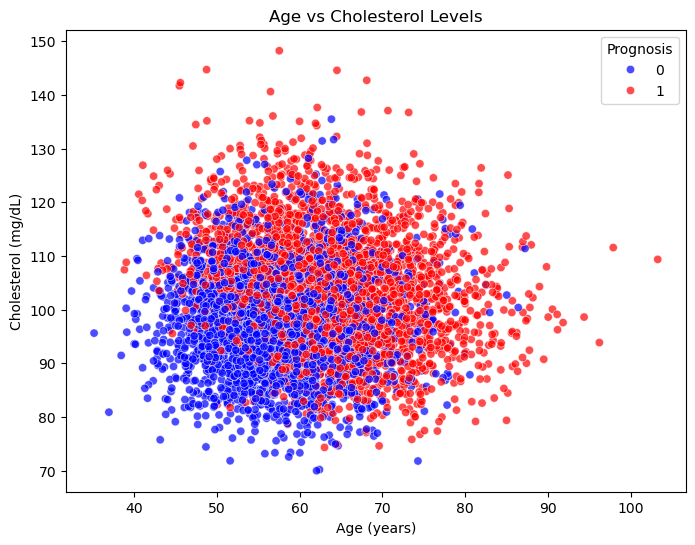

In [20]:
# Scatter plot: Age vs Cholesterol, colored by prognosis #Older patients tend to have higher cholesterol levels.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["age"], y=df["cholesterol"], hue=df["prognosis"], alpha=0.7, palette=["blue", "red"])
plt.title("Age vs Cholesterol Levels")
plt.xlabel("Age (years)")
plt.ylabel("Cholesterol (mg/dL)")
plt.legend(title="Prognosis")
plt.show()

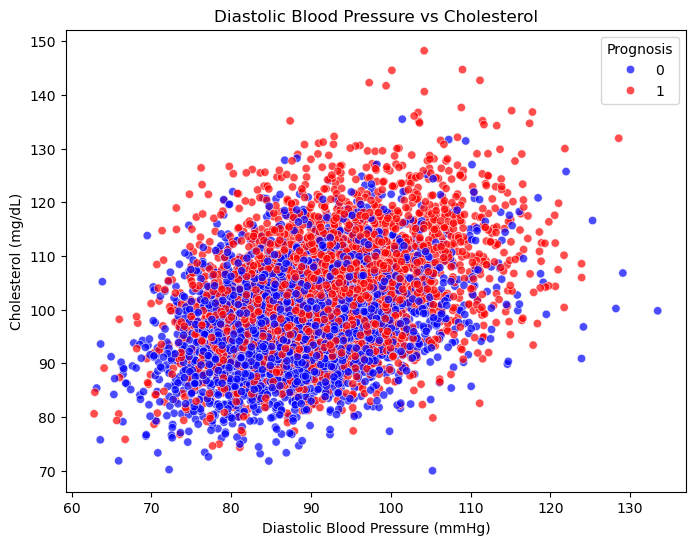

In [21]:
# Scatter plot: Diastolic BP vs Cholesterol, colored by prognosis #Retinopathy cases are more common in high BP and high cholesterol regions.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["diastolic_bp"], y=df["cholesterol"], hue=df["prognosis"], alpha=0.7, palette=["blue", "red"])
plt.title("Diastolic Blood Pressure vs Cholesterol")
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.ylabel("Cholesterol (mg/dL)")
plt.legend(title="Prognosis")
plt.show()

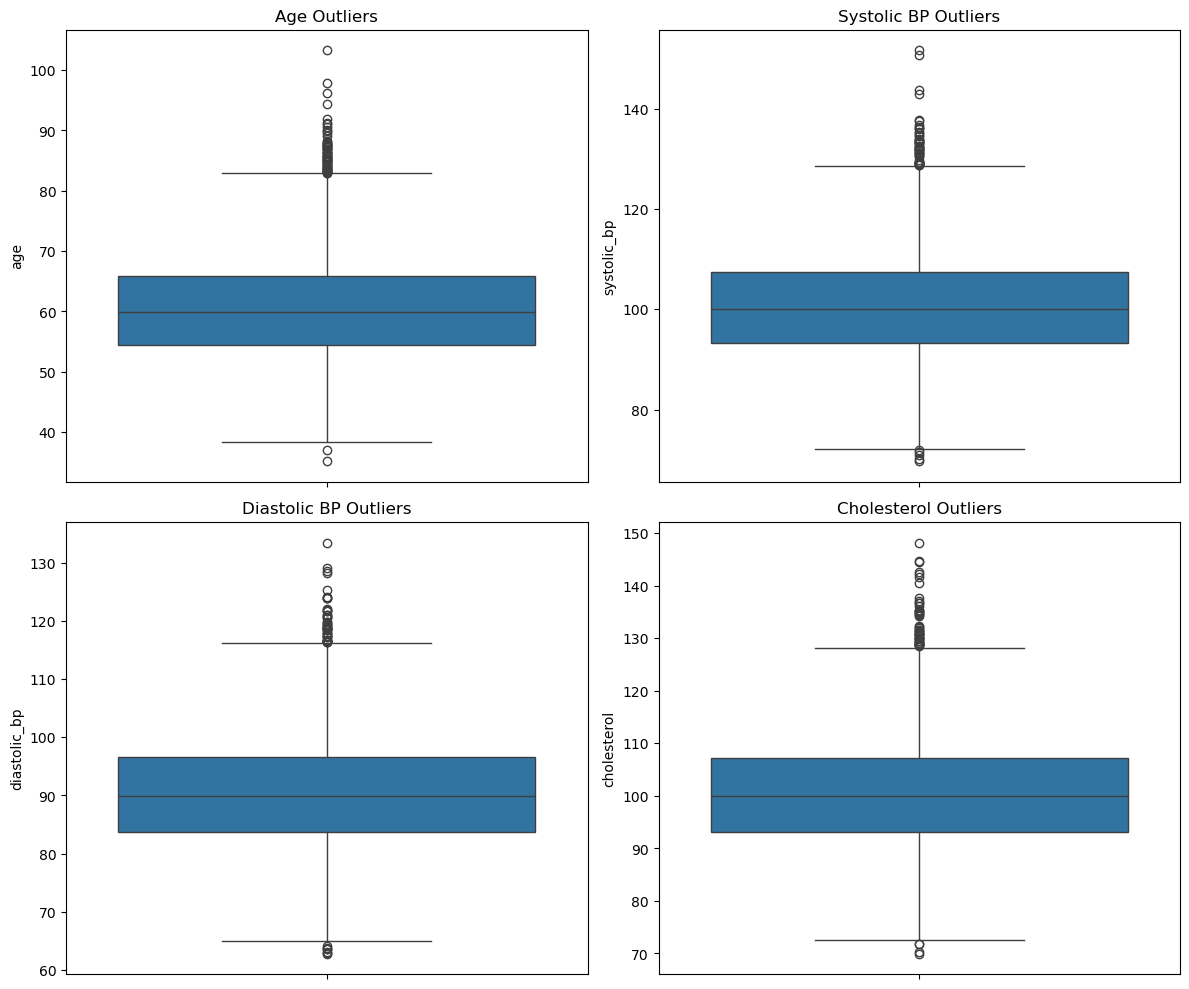

In [19]:
# Boxplots to check for outliers in numerical variables 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=df['age'], ax=axes[0, 0]).set(title='Age Outliers')
sns.boxplot(y=df['systolic_bp'], ax=axes[0, 1]).set(title='Systolic BP Outliers')
sns.boxplot(y=df['diastolic_bp'], ax=axes[1, 0]).set(title='Diastolic BP Outliers')
sns.boxplot(y=df['cholesterol'], ax=axes[1, 1]).set(title='Cholesterol Outliers')

plt.tight_layout()
plt.show()

In [20]:
#outlier Detection
def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df        

In [21]:
outlier_Detection(df,['age','systolic_bp','diastolic_bp','cholesterol','prognosis'])

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1.0
1,63.529850,99.379736,84.852361,110.382411,1.0
2,69.003986,111.349455,109.850616,100.828246,1.0
3,82.638210,95.056128,79.666851,87.066303,1.0
4,78.346286,109.154591,90.713220,92.511770,1.0
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0.0
5996,63.099686,100.039527,93.515186,104.971404,1.0
5997,55.562243,98.421446,102.697875,120.875951,1.0
5998,63.468956,106.809289,88.060631,106.052213,1.0


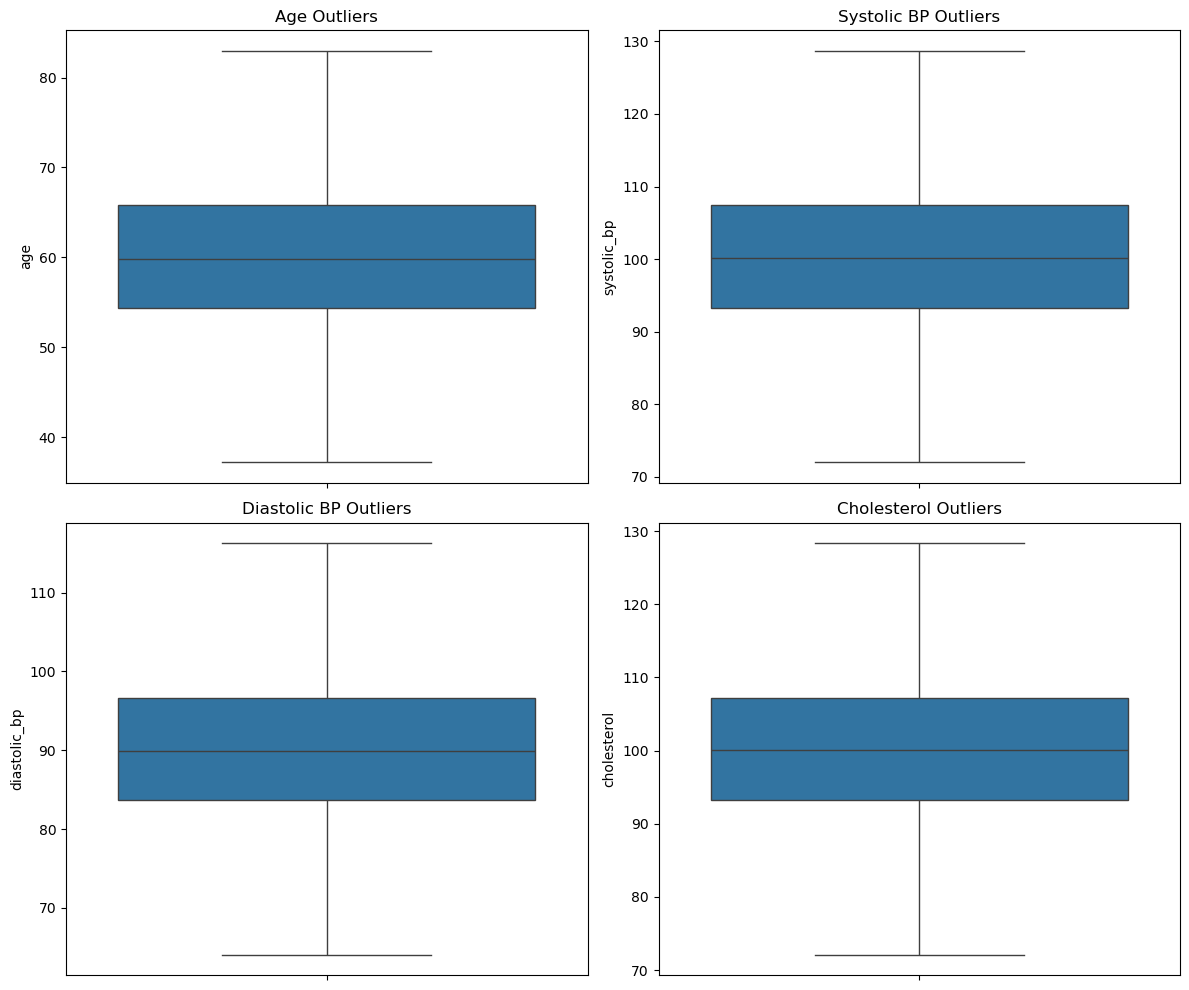

In [22]:
# Boxplots to check for outliers in numerical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=df['age'], ax=axes[0, 0]).set(title='Age Outliers')
sns.boxplot(y=df['systolic_bp'], ax=axes[0, 1]).set(title='Systolic BP Outliers')
sns.boxplot(y=df['diastolic_bp'], ax=axes[1, 0]).set(title='Diastolic BP Outliers')
sns.boxplot(y=df['cholesterol'], ax=axes[1, 1]).set(title='Cholesterol Outliers')

plt.tight_layout()
plt.show()

In [23]:
df.corr()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
age,1.000000,0.009892,-0.005572,-0.006265,0.378763
systolic_bp,0.009892,1.000000,0.407098,0.406643,0.340935
diastolic_bp,-0.005572,0.407098,1.000000,0.398700,0.183138
cholesterol,-0.006265,0.406643,0.398700,1.000000,0.316333
prognosis,0.378763,0.340935,0.183138,0.316333,1.000000


<Axes: >

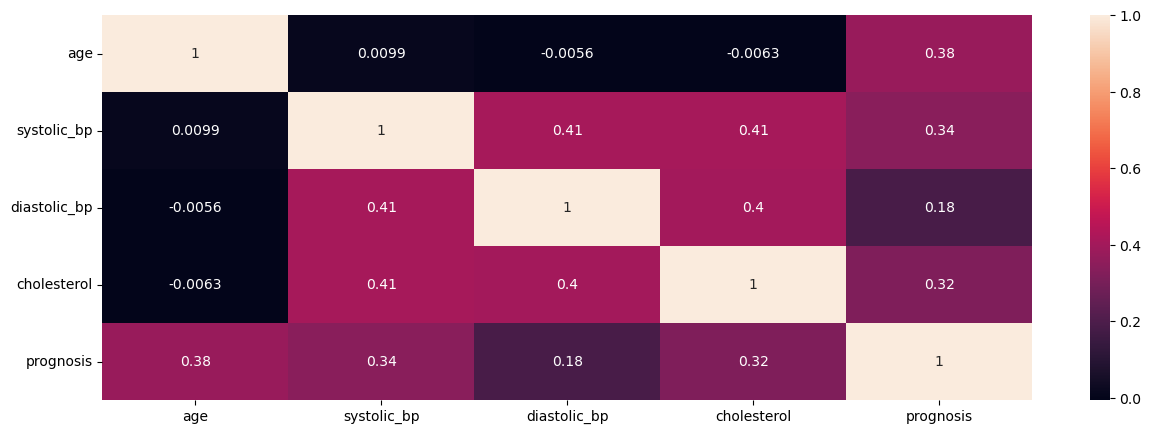

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

In [25]:
numerical_cols = df.columns[:-1]

In [26]:
# Standardize numerical features

sc = StandardScaler()
df[numerical_cols] = sc.fit_transform(df[numerical_cols])

In [27]:
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,1.987803,-1.457585,-1.094761,-2.003609,1.0
1,0.368091,-0.121084,-0.588848,0.951463,1.0
2,1.016869,1.014219,2.029306,0.023510,1.0
3,2.632758,-0.531169,-1.131944,-1.313126,1.0
4,2.124091,0.806041,0.024980,-0.784232,1.0


## Check skewness

In [28]:
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness}")

Skewness of age: 0.33454286269581607
Skewness of systolic_bp: 0.2479138429511245
Skewness of diastolic_bp: 0.26263976493792357
Skewness of cholesterol: 0.2630704430194126


# Model Building

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [30]:
x = df.drop('prognosis',axis=1)  # Replace 'torque_motor_speed' with the actual target column
y = df['prognosis'] 

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train

,age,systolic_bp,diastolic_bp,cholesterol
3897,-0.423360,-0.129445,-0.187738,-0.646224
5628,0.415392,1.154146,2.379106,1.337555
1756,-0.389019,-0.142297,0.435724,-0.160714
2346,1.001927,-0.483500,-0.988299,-0.671853
2996,-0.914862,-0.194740,-1.326278,-0.498329
...,...,...,...,...
3772,0.750350,-0.509116,-0.092285,1.218742
5191,-2.006644,-0.830450,-0.557505,-0.863156
5226,1.042300,-0.483713,0.195993,0.487553
5390,0.203687,0.290398,-1.207576,1.724143


In [33]:
x_test

,age,systolic_bp,diastolic_bp,cholesterol
1782,-1.524492,0.091569,-0.428123,0.585006
3917,-0.446010,1.657773,2.277067,1.382045
221,-0.393181,0.199870,-0.765397,-1.330467
2135,-0.624478,0.888048,-0.669365,-0.531343
5224,-0.052713,0.411207,0.409406,0.859015
...,...,...,...,...
2543,0.583872,-0.113936,0.583388,0.356269
1773,0.921062,-0.910978,-0.584131,-0.290723
2846,0.698380,-0.698528,0.120583,-0.455302
5799,0.673055,0.374117,1.026859,-0.906565


In [34]:
y_train

3897    0.0
5628    1.0
1756    0.0
2346    1.0
2996    0.0
       ... 
3772    1.0
5191    0.0
5226    0.0
5390    1.0
860     1.0
Name: prognosis, Length: 4800, dtype: float64

In [35]:
y_test

1782    0.0
3917    1.0
221     0.0
2135    0.0
5224    0.0
       ... 
2543    0.0
1773    1.0
2846    1.0
5799    1.0
1765    1.0
Name: prognosis, Length: 1200, dtype: float64

In [36]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [46]:
results = {}

# Train & Evaluate Models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Report" : classification_report(y_test, y_pred)
        
    }

# Convert results to DataFrame for better visualization
# Convert results to DataFrame, Transpose it, and Sort by Accuracy
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display the sorted model performance
print(results_df)

                     Accuracy Precision  Recall  F1-score  \
SVM                  0.749167  0.762136  0.7536  0.757844   
Logistic Regression  0.746667  0.760976  0.7488  0.754839   
Random Forest           0.735  0.738725    0.76  0.749211   
KNN                    0.7275  0.727829  0.7616  0.744332   
XGBoost              0.720833  0.727987  0.7408  0.734338   

                                                                Report  
SVM                                precision    recall  f1-score   ...  
Logistic Regression                precision    recall  f1-score   ...  
Random Forest                      precision    recall  f1-score   ...  
KNN                                precision    recall  f1-score   ...  
XGBoost                            precision    recall  f1-score   ...  


In [38]:
# Get the best model based on Accuracy (or another metric)
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).index[0]  
best_model = models[best_model_name]

print(f"\nThe best model is: {best_model_name}")


The best model is: SVM


# Hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

In [51]:
# Define parameter grid for SVM
svm_params = {
    "C": [0.1, 1, 10, 50, 100],  # Regularization parameter
    "kernel": ["linear", "rbf", "poly"],  # Trying different kernels
}

# Perform GridSearchCV for SVM
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring="accuracy", n_jobs=-1)
svm_grid.fit(x_train, y_train)

# Best parameters and best model for SVM
best_svm_model = svm_grid.best_estimator_
best_svm_params = svm_grid.best_params_
best_svm_accuracy = svm_grid.best_score_

# Evaluate the best SVM model on the test set
y_pred_best_svm = best_svm_model.predict(x_test)
best_svm_test_accuracy = accuracy_score(y_test, y_pred)
best_svm_roc_auc = roc_auc_score(y_test, best_svm_model.predict_proba(x_test)[:, 1])

(best_svm_params, best_svm_accuracy), (best_svm_test_accuracy, best_svm_roc_auc)

(({'C': 0.1, 'kernel': 'rbf'}, 0.7485416666666668),
 (0.7208333333333333, 0.8229815652173913))

In [71]:
# Get the best model
best_model = svm_grid.best_estimator_
print(f"\nThe best model is: {best_model}")


The best model is: SVC(C=0.1, probability=True, random_state=42)


In [53]:
from sklearn.metrics import confusion_matrix

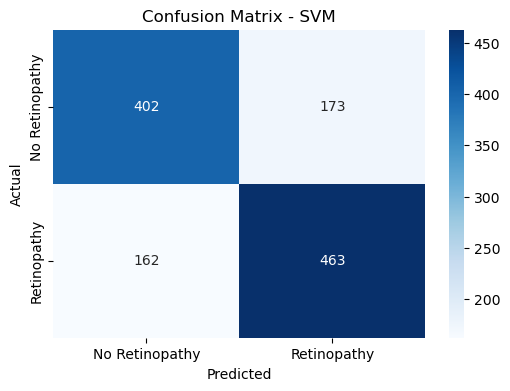

In [65]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Retinopathy", "Retinopathy"],
            yticklabels=["No Retinopathy", "Retinopathy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Dployment

In [66]:
import pickle
import joblib

In [72]:
# Save the model using pickle
with open("svm_best_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler as well (needed for preprocessing new data)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(sc, scaler_file)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [73]:
# Load the model and scaler
with open("svm_best_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Example: Predict on new data
new_data = [[49.611850,94.857639,86.615671,107.643986]]  # Example input: [age, systolic_bp, diastolic_bp, cholesterol]
new_data_scaled = loaded_scaler.transform(new_data)

# Predict
prediction = loaded_model.predict(new_data_scaled)
print("Prediction:", prediction[0])  # 0 (no retinopathy) or 1 (retinopathy)

Prediction: 0.0


In [74]:
import nbformat
from nbconvert import PythonExporter

# Load the notebook
notebook_filename = "Diabetic_Retinopathy.ipynb"
with open(notebook_filename, 'r', encoding='utf-8') as notebook_file:
    notebook_content = nbformat.read(notebook_file, as_version=4)

# Convert to Python script
python_exporter = PythonExporter()
python_code, _ = python_exporter.from_notebook_node(notebook_content)

# Save to a .py file
python_filename = notebook_filename.replace('.ipynb', '.py')
with open(python_filename, 'w', encoding='utf-8') as python_file:
    python_file.write(python_code)

print(f"Notebook converted to {python_filename}")

Notebook converted to Diabetic_Retinopathy.py
